In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

In [2]:
# Set pandas defaults
pd.options.mode.chained_assignment = None  # default='warn'
sns.set(style='whitegrid', palette='deep', font_scale=1.2)
pd.set_option('max_columns',40, 'precision',4)

In [22]:
# Adding extra cols
data = pd.read_csv('../Data/34.B2.9F.A9.csv', infer_datetime_format=True, index_col='Timestamp', parse_dates=['Timestamp'])
data.head()

,Module,Type,Temp_Mod,VBus,V_MPPT,V_Panel
Timestamp,,,,,,
2017-10-01 00:03:19,34.B2.9F.A9,P-Solar Panel,20.4,3.279,3.290,0.000
2017-10-01 00:08:13,34.B2.9F.A9,P-Solar Panel,20.2,3.281,3.290,0.321
2017-10-01 00:13:14,34.B2.9F.A9,P-Solar Panel,20.1,3.282,3.281,0.262
2017-10-01 00:18:24,34.B2.9F.A9,P-Solar Panel,20.0,3.278,3.281,0.233
2017-10-01 00:31:59,34.B2.9F.A9,P-Solar Panel,19.9,3.280,3.290,0.350


In [23]:
resampled = data.resample('5Min').mean()
resampled = resampled.fillna(method='bfill')
resampled.head()

,Temp_Mod,VBus,V_MPPT,V_Panel
Timestamp,,,,
2017-10-01 00:00:00,20.4,3.279,3.290,0.000
2017-10-01 00:05:00,20.2,3.281,3.290,0.321
2017-10-01 00:10:00,20.1,3.282,3.281,0.262
2017-10-01 00:15:00,20.0,3.278,3.281,0.233
2017-10-01 00:20:00,19.9,3.280,3.290,0.350


In [24]:
resampled_shorted = resampled['2019-03':'2019-04-20']
resampled_shorted

,Temp_Mod,VBus,V_MPPT,V_Panel
Timestamp,,,,
2019-03-01 00:00:00,23.6,3.282,3.290,0.000
2019-03-01 00:05:00,23.7,3.278,3.281,0.000
2019-03-01 00:10:00,23.7,3.281,3.290,0.000
2019-03-01 00:15:00,23.8,3.278,3.290,0.000
2019-03-01 00:20:00,23.8,3.282,3.285,0.000
...,...,...,...,...
2019-04-20 23:35:00,23.5,3.283,3.285,0.000
2019-04-20 23:40:00,23.2,3.284,3.285,0.029
2019-04-20 23:45:00,23.2,3.284,3.285,0.029


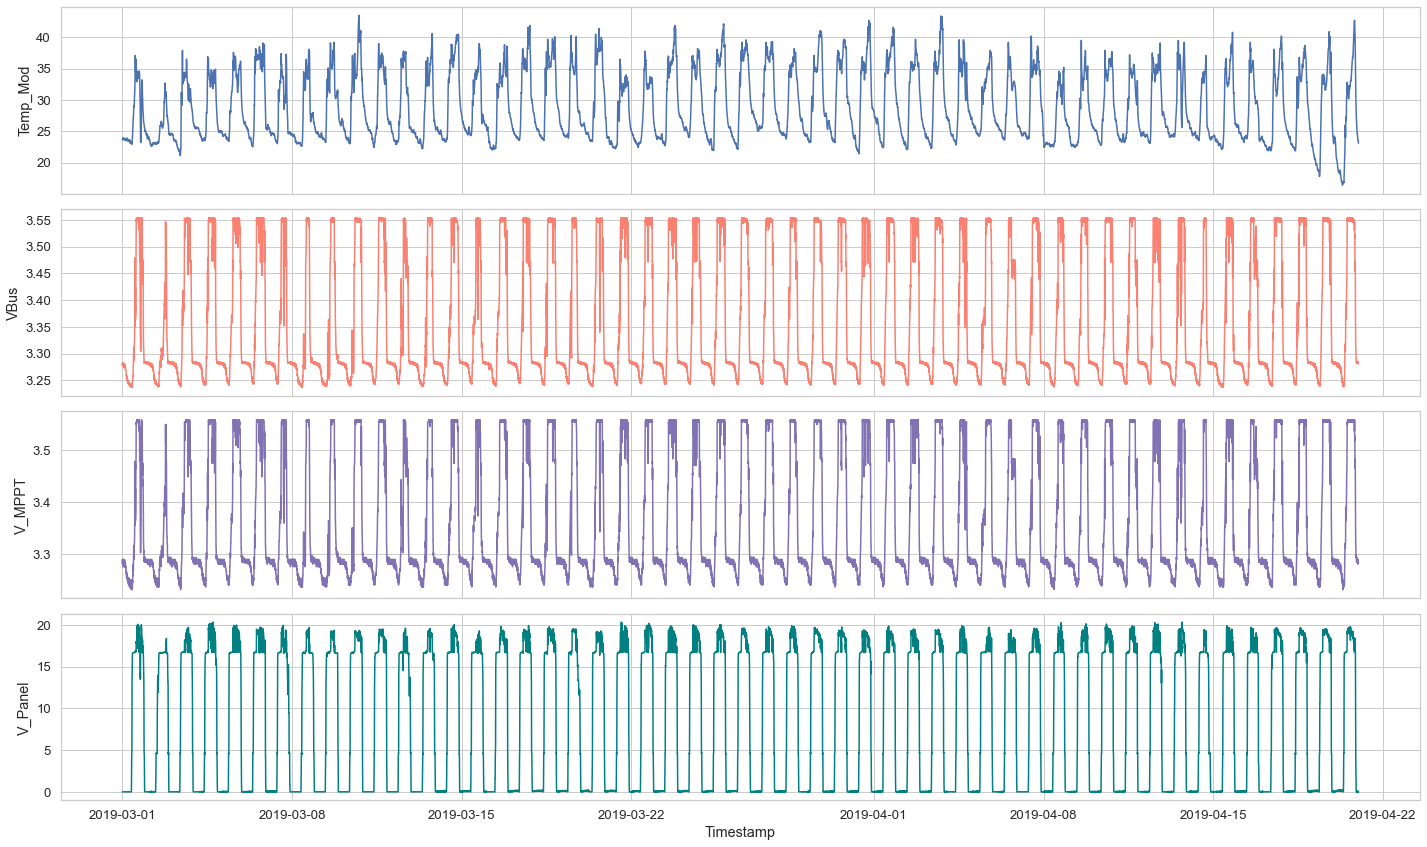

In [32]:
# Take a look to the sample 6000 to 6600 of temperatures
fig, axx = plt.subplots(4, 1, figsize=(20,12), sharex=True)
sns.lineplot(data = resampled_shorted.Temp_Mod, ax=axx[0])
sns.lineplot(data = resampled_shorted.VBus, ax=axx[1], color='salmon')
sns.lineplot(data = resampled_shorted.V_MPPT, ax=axx[2], color='m')
sns.lineplot(data = resampled_shorted.V_Panel, ax=axx[3], color='teal')
plt.tight_layout()